<a href="https://colab.research.google.com/github/hughjafro/DS-Unit-2-Sprint-2-Linear-Regression/blob/master/CTolbert_Linear_Regression_Sprint_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import everything you could ever need. ;)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

/usr/local/lib/python3.6/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
# Ukraine Used Car Sale Price Prediction
df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/car_regression.csv')
print(df.shape)
df.head()

(8495, 9)


,make,price,body,mileage,engV,engType,registration,year,drive
0,23,15500.0,0,68,2.5,1,1,2010,1
1,50,20500.0,3,173,1.8,1,1,2011,2
2,50,35000.0,2,135,5.5,3,1,2008,2
3,50,17800.0,5,162,1.8,0,1,2012,0
4,55,16600.0,0,83,2.0,3,1,2013,1


In [3]:
# Check for NaNs
df.isna().sum()

make            0
price           0
body            0
mileage         0
engV            0
engType         0
registration    0
year            0
drive           0
dtype: int64

In [4]:
# Check datatypes
df.dtypes

make              int64
price           float64
body              int64
mileage           int64
engV            float64
engType           int64
registration      int64
year              int64
drive             int64
dtype: object

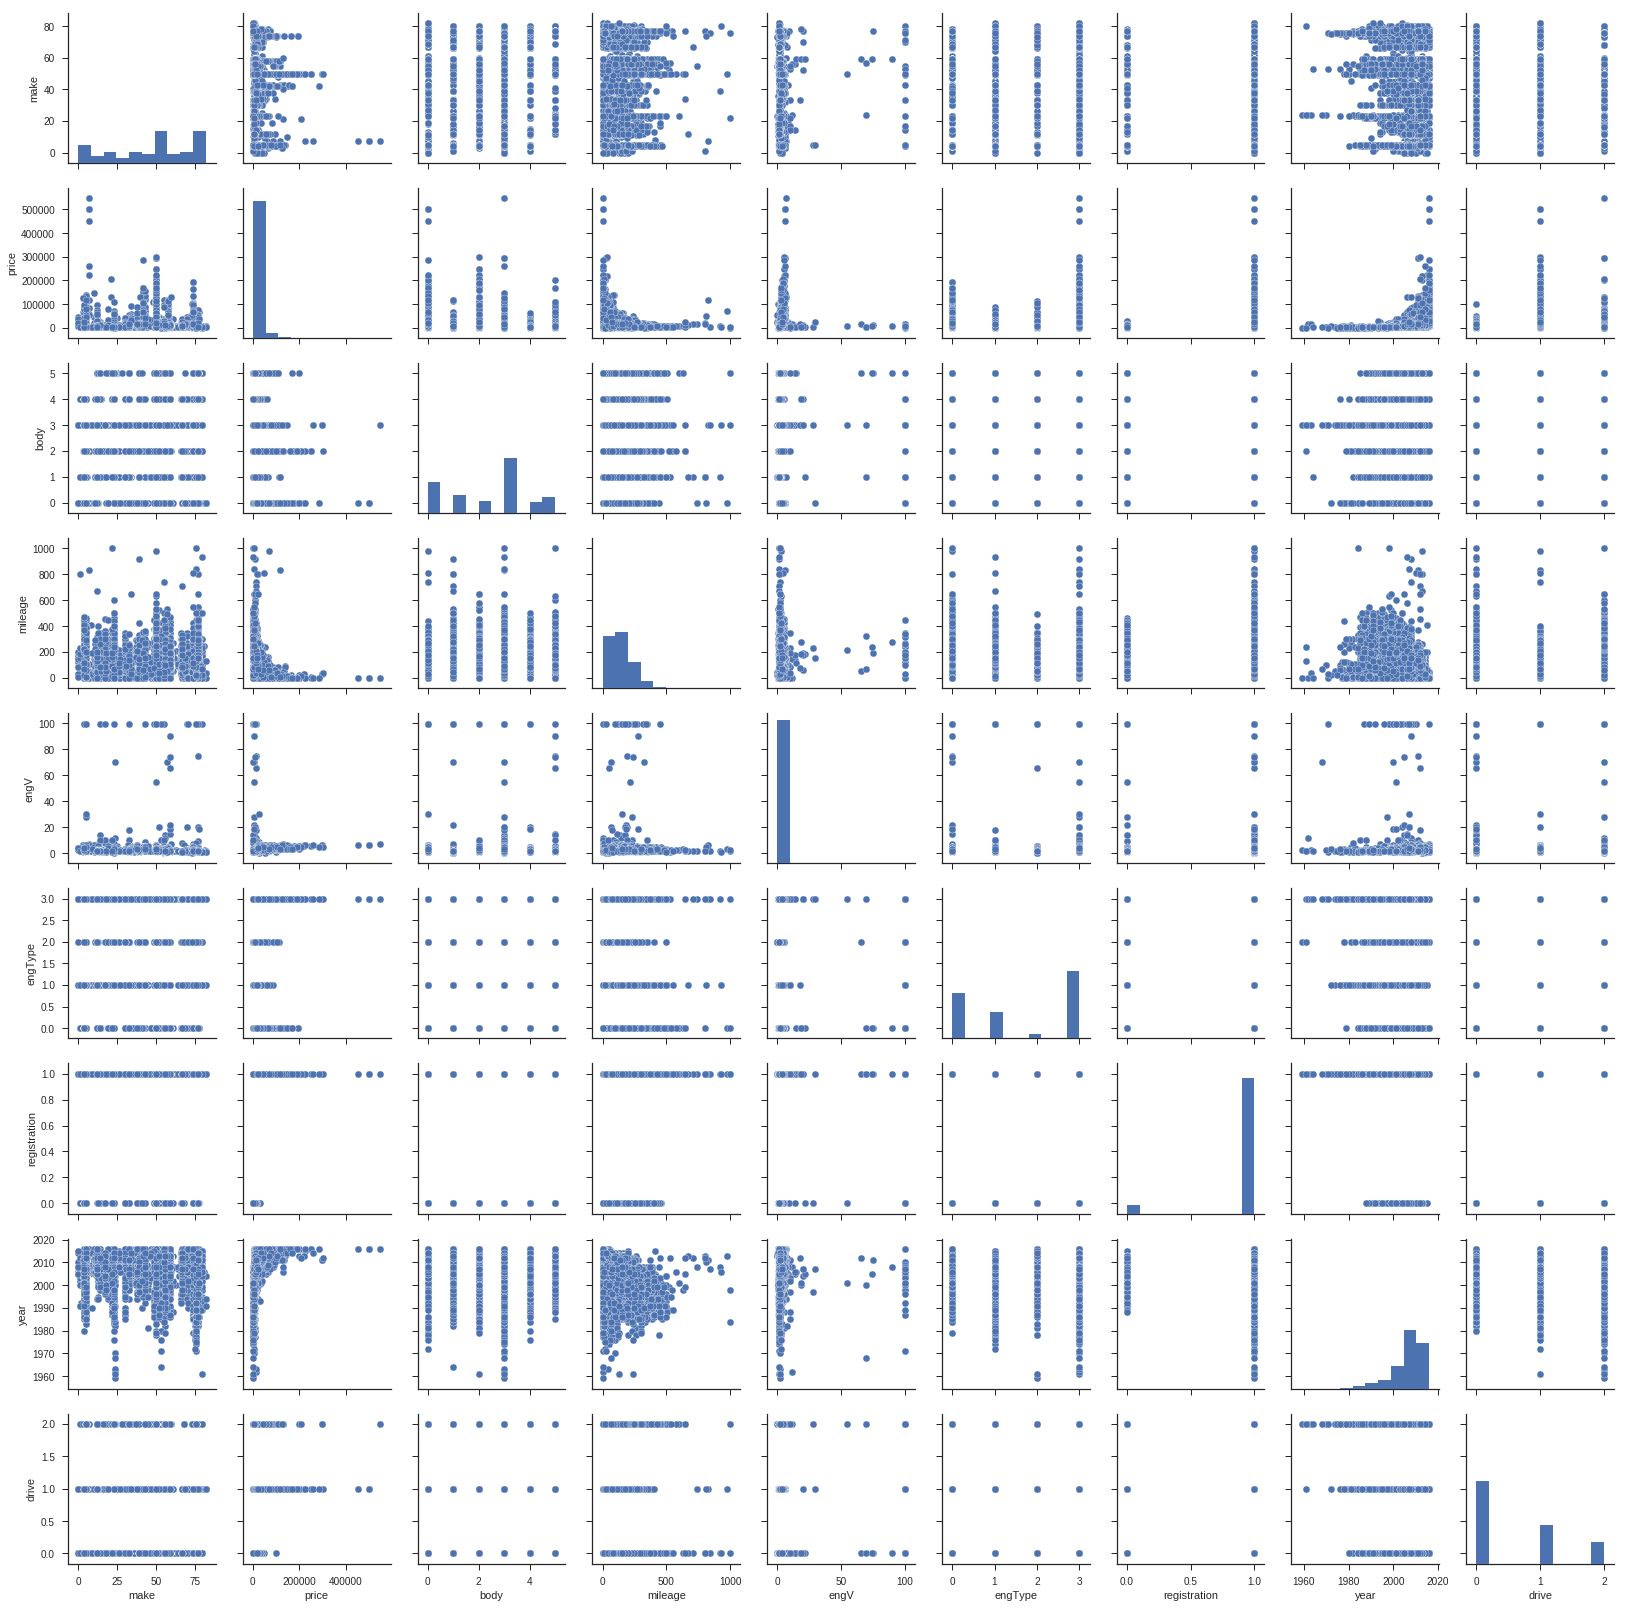

In [5]:
# Visual Test
sns.set(style='ticks', color_codes=True)
graph = sns.pairplot(df)

# Predictive Modeling with Linear Regression

## 1.1 Divide the dataset features into an X matrix and y vector ("price" is what we want to predict).

In [0]:
# Define X matrix, y vector
X = df.drop(columns=['price'])
y = df['price']

## 1.2 Split the data into test and train datasets using train_test_split

In [7]:
# Setup and split the data into 50% train and 50% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Check the shape
print(X.shape)
print(y.shape)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8495, 8)
(8495,)
(4247, 8)
(4248, 8)
(4247,)
(4248,)


## 1.3 Use Scikit-Learn to fit a multiple regression model using your training data.

In [8]:
# Fit a multiple regression model to the training data
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

## 1.4 Report the Intercept and Coefficient Values for the fitted model

In [9]:
# Calculate the intercept and coefficient values

beta_0 = model.intercept_ 
beta_i = model.coef_

print("Coefficient: \n", model.coef_)
print("\nIntercept: ", model.intercept_)

Coefficient: 
 [  -35.22479484 -1672.11973555   -37.12848399   269.61582544
 -1284.74375962  4649.46225339  1098.2829573   7886.89079148]

Intercept:  -2184591.0115608736


## 1.5 Use the test data to make predictions

In [0]:
# Make predictions from the test data
y_test_predict = model.predict(X_test)



## 1.6 Calculate and report both the Root-Mean-Square error and $R^2$ for the model. 

In [11]:
# Compute the root mean squared error of actual (Y_test) vs predicted (y_test_predict) 

MSE = mean_squared_error(y_test, y_test_predict)

RMSE = (np.sqrt(mean_squared_error(y_test, y_test_predict)))

print('MSE is {}:'.format(MSE))

print('RMSE is {}:'.format(RMSE))

R2 = r2_score(y_test, y_test_predict)

print('R^2 is {}'.format(R2))

MSE is 504905647.2241802:
RMSE is 22470.10563446866:
R^2 is 0.2694482951962195


## 1.7 How should we interpret the coefficient corresponding to the "year" feature?

The year coefficient is 1098.2829573. This means that for every year change, there will be a $1098.2829573 change in price.

## 1.8 How should we interpret the Root-Mean-Square Error?

The root mean square error is RMSE is 22470.10563446866. This means that on average our predictions are $22,470 off.

## 1.9 How should we interpret the $R^2$?

The R^2 is 0.2694482951962195 and means that 26.9% of price can be explained by explained by the model.

# Log-Linear and Polynomial Regression

## 2.1 Engineer a new variable by taking the log of the price varible.

In [0]:
# Log transformation of y variable
df['ln_price'] = np.log(df['price'])

## 2.2 Use scatterplots or seaborn's pairplot function to do the "eyeball test" for non-linearly distributed features.

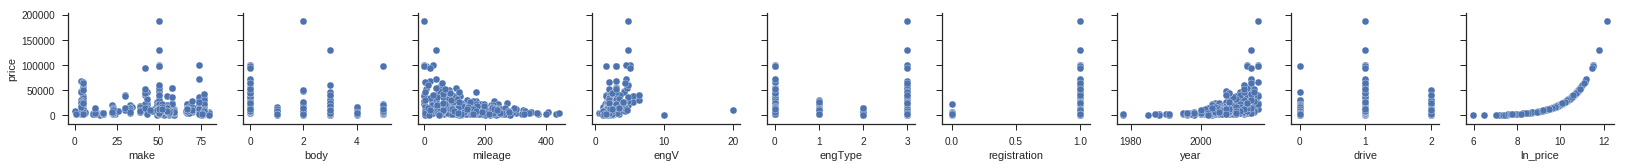

In [13]:
sns.set(style='ticks', color_codes=True)

# Generate a list of column headers not including price
x_columns = df.columns.drop('price')

# Sample our dataframe to take 1/20th or 5% of the values
sampled = df.sample(frac=.05, replace=True)

# Only plot the scatterplot of x variables with our y variables
sns.pairplot(data=sampled, y_vars=['price'], x_vars=x_columns)

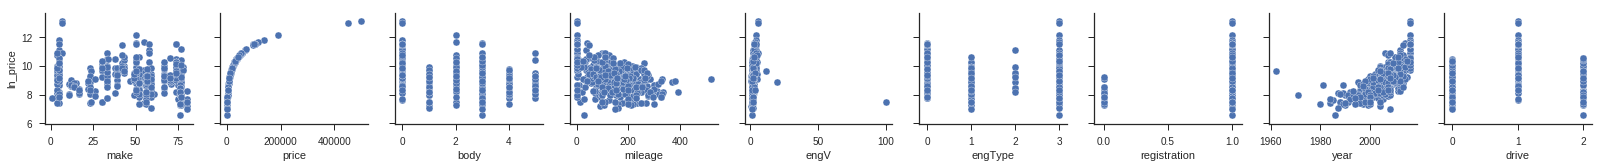

In [14]:
#Log-transformed y pairplot
sns.set(style='ticks', color_codes=True)

# Generate a list of column headers not including price
x_columns = df.columns.drop('ln_price')

# Sample our dataframe to take 1/20th or 5% of the values
sampled = df.sample(frac=.05, replace=True)

# Only plot the scatterplot of x variables with our y variables
sns.pairplot(data=sampled, y_vars=['ln_price'], x_vars=x_columns)

## 2.3 If appropriate, create any polynomial features. 

In [15]:
# Generate a new engV_squared feature
df['engV_squared'] = df['engV']**2

# Generate a new mileage_squared feature
df['mileage_squared'] = df['mileage']**2

df.head()

,make,price,body,mileage,engV,engType,registration,year,drive,ln_price,engV_squared,mileage_squared
0,23,15500.0,0,68,2.5,1,1,2010,1,9.648595,6.25,4624
1,50,20500.0,3,173,1.8,1,1,2011,2,9.928180,3.24,29929
2,50,35000.0,2,135,5.5,3,1,2008,2,10.463103,30.25,18225
3,50,17800.0,5,162,1.8,0,1,2012,0,9.786954,3.24,26244
4,55,16600.0,0,83,2.0,3,1,2013,1,9.717158,4.00,6889


## 2.4 Use the new log-transformed y variable and your x variables (including any new polynomial features) to fit a new linear regression model. Then report the: intercept, coefficients, RMSE, and $R^2$.

In [16]:
# Log-Linear regression
# Seperate dependent and independent variables
y = df.loc[:, ['ln_price']].values
X = df.loc[:, ['make', 'body', 'mileage', 'mileage_squared',
               'engV', 'engV_squared', 'engType', 'registration',
               'year', 'drive']].values

# Split into test and train dataset
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=.5, random_state=42)

# Fit model using training dataset
model = LinearRegression()
model.fit(X_train, Y_train)

# Create new predictions using X_test
y_pred = model.predict(X_test)

# Measure accuracy using y_test and y_pred
RMSE = (np.sqrt(mean_squared_error(Y_test, y_pred)))
R2 = r2_score(Y_test, y_pred)

print('RMSE is {}'.format(RMSE))
print('R^2 is {}'.format(R2))

print("\nCoefficients: ", model.coef_[0])
print("\nIntercepts: ", model.intercept_)

RMSE is 0.5074346474375246
R^2 is 0.7264980340330629

Coefficients:  [-9.01098470e-04 -6.24260458e-02 -9.92121001e-04  1.63253283e-06
  2.45616544e-01 -2.45747117e-03 -5.81186093e-02  7.54295978e-01
  8.93544977e-02  2.81755604e-01]

Intercepts:  [-171.14998078]


## 2.5 How might we interpret the coefficient on "year" in this new regression model?

The coefficient on year for the new regression model is .08935 and says that on average there is an 8.9% change in price for every change in year.

# Gradient Descent

## 3.1 What does Gradient Descent seek to minimize?

Gradient descent tries to minimize, or find the local minimum of a function. This is done through moving, or stepping, in the direction of the steepest descent, until it is zero or greatly minimized.

## 3.2 What is the "Learning Rate" and what is its function?

The learning rate will determine the iterative size of the steps that will be taken. If the learning rate is too large, you may keep overshooting the minimum. If it too small, the steps may be so small that you may never reach the minimum.

# Model Diagnostics

## 4.1 Use statsmodels to run a log-linear or log-polynomial linear regression with robust standard errors.

In [0]:
# imports all in one place
import seaborn as sns
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy import stats

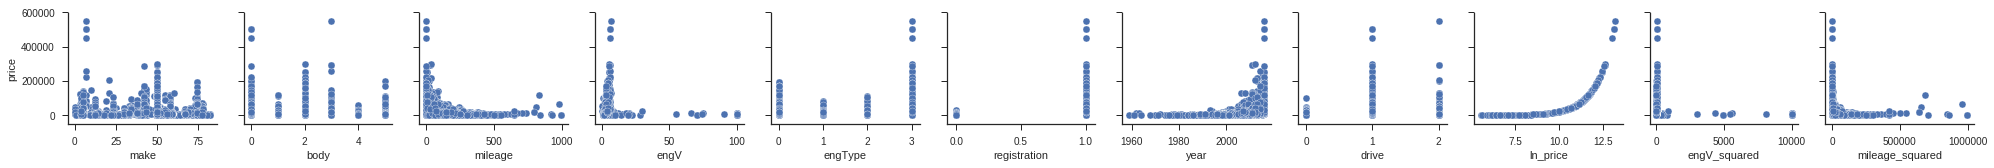

In [19]:
sns.set(style="ticks", color_codes=True)

# Generate a list of column headers not including price
x_columns = df.columns.drop(['price'])

# Only plot the scatterplot of x variables with our y variable
fig = sns.pairplot(data=df, y_vars=['price'], x_vars=x_columns)

In [20]:
# Prepare X and y variable
X = df[['make', 'body', 'mileage',
               'engV', 'engType', 'registration',
               'year', 'drive']]

y = df['price']

# Use statsmodel to run a regression

# This is like using np.ones to add a vector of ones
X = sm.add_constant(X)

# Use OLS predictions
model = sm.OLS(y, X).fit(cov_type='HC3')
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.285
Model:                            OLS   Adj. R-squared:                  0.285
Method:                 Least Squares   F-statistic:                     229.2
Date:                Fri, 18 Jan 2019   Prob (F-statistic):               0.00
Time:                        18:28:21   Log-Likelihood:                -96464.
No. Observations:                8495   AIC:                         1.929e+05
Df Residuals:                    8486   BIC:                         1.930e+05
Df Model:                           8                                         
Covariance Type:                  HC3                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -2.303e+06   8.15e+04    -28.242   

In [21]:
# Remove outliers

print('Shape before removing outliers -',df.shape)

# Find the points that are more than 3 z-scores away from mean of columns
df = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]

print('Shape after removing outliers -',df.shape)

Shape before removing outliers - (8495, 12)
Shape after removing outliers - (7624, 12)


In [30]:
# Re-run regression without outliers
# Prepare X and y variable
X = df[['make', 'body', 'mileage',
               'engV', 'engType', 'registration',
               'year', 'drive']]

y = df['price']

# Use statsmodel to run a regression

# This is like using np.ones to add a vector of ones
X = sm.add_constant(X)

# Use OLS predictions and use Robust standard errors HC3
model = sm.OLS(y, X).fit(cov_type='HC3')
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.568
Model:                            OLS   Adj. R-squared:                  0.567
Method:                 Least Squares   F-statistic:                     622.1
Date:                Fri, 18 Jan 2019   Prob (F-statistic):               0.00
Time:                        18:47:03   Log-Likelihood:                -80398.
No. Observations:                7624   AIC:                         1.608e+05
Df Residuals:                    7616   BIC:                         1.609e+05
Df Model:                           7                                         
Covariance Type:                  HC3                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
make           -23.2110      4.819     -4.816   

###Log-linear regression

In [37]:
# Log-linear regression
X = df[['make', 'body', 'mileage',
               'engV', 'engType', 'registration',
               'year', 'drive']]

y = df['ln_price']

# Use statsmodel to run a regression

# This is like using np.ones to add a vector of ones
X = sm.add_constant(X)

# Use OLS predictions
model = sm.OLS(y, X).fit(cov_type='HC3')
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:               ln_price   R-squared:                       0.730
Model:                            OLS   Adj. R-squared:                  0.729
Method:                 Least Squares   F-statistic:                     2289.
Date:                Fri, 18 Jan 2019   Prob (F-statistic):               0.00
Time:                        18:55:40   Log-Likelihood:                -4514.4
No. Observations:                7624   AIC:                             9045.
Df Residuals:                    7616   BIC:                             9100.
Df Model:                           7                                         
Covariance Type:                  HC3                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
make            -0.0008      0.000     -3.511   

###Log-Polynomial Regression
Gives better p-values than log-linear

In [35]:
X2 = df[['make', 'body', 'mileage', 'mileage_squared',
               'engV', 'engV_squared', 'engType', 'registration',
               'year', 'drive']] 

y = df['ln_price']

# This is like using np.ones to add a vector of ones
X2 = sm.add_constant(X2)

# Use OLS predictions with robust standard errors
model = sm.OLS(y, X2).fit(cov_type='HC3')
predictions = model.predict(X2) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:               ln_price   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.773
Method:                 Least Squares   F-statistic:                     2594.
Date:                Fri, 18 Jan 2019   Prob (F-statistic):               0.00
Time:                        18:55:33   Log-Likelihood:                -3846.1
No. Observations:                7624   AIC:                             7712.
Df Residuals:                    7614   BIC:                             7782.
Df Model:                           9                                         
Covariance Type:                  HC3                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
make               -0.0006      0.000     

In [36]:
X2.columns

Index(['make', 'body', 'mileage', 'mileage_squared', 'engV', 'engV_squared',
       'engType', 'registration', 'year', 'drive'],
      dtype='object')

## 4.2 Calculate the Variance Inflation Factor (VIF) of our X variables. Do we have multicollinearity problems?

###VIF for log-linear regression

In [25]:
# Calculate the VIF for multicollinearity for log-linear regression

print(X.columns, '\n\n')

vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)

Index(['make', 'body', 'mileage', 'engV', 'engType', 'registration', 'year',
       'drive'],
      dtype='object') 


[1.0457297091505493, 1.210886350766579, 1.768488194453854, 1.2736031226442794, 1.1344040061456824, 177775.97539972607, 1.6149189605174712, 1.2983795064727253]


In [29]:
# Check correlation matrix since there is a VIF > 10
X.corr()

,make,body,mileage,engV,engType,registration,year,drive
make,1.000000,0.042361,-0.013547,-0.131352,-0.033533,NaN,-0.007673,-0.191456
body,0.042361,1.000000,0.291888,-0.217061,-0.183831,NaN,-0.135746,-0.182071
mileage,-0.013547,0.291888,1.000000,0.076637,-0.215870,NaN,-0.575107,0.088846
engV,-0.131352,-0.217061,0.076637,1.000000,-0.024769,NaN,-0.004067,0.418729
engType,-0.033533,-0.183831,-0.215870,-0.024769,1.000000,NaN,-0.057111,-0.049855
registration,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year,-0.007673,-0.135746,-0.575107,-0.004067,-0.057111,NaN,1.000000,-0.131895
drive,-0.191456,-0.182071,0.088846,0.418729,-0.049855,NaN,-0.131895,1.000000


In [27]:
no_reg = X.drop('registration', axis=1)
no_reg.corr()

,make,body,mileage,engV,engType,year,drive
make,1.000000,0.042361,-0.013547,-0.131352,-0.033533,-0.007673,-0.191456
body,0.042361,1.000000,0.291888,-0.217061,-0.183831,-0.135746,-0.182071
mileage,-0.013547,0.291888,1.000000,0.076637,-0.215870,-0.575107,0.088846
engV,-0.131352,-0.217061,0.076637,1.000000,-0.024769,-0.004067,0.418729
engType,-0.033533,-0.183831,-0.215870,-0.024769,1.000000,-0.057111,-0.049855
year,-0.007673,-0.135746,-0.575107,-0.004067,-0.057111,1.000000,-0.131895
drive,-0.191456,-0.182071,0.088846,0.418729,-0.049855,-0.131895,1.000000


Yes, there appears to be multicollinearity issues with 'registrations'. The VIF is way above 10, at 177775.975, and correlation issues can be seen when running the correlation matrix.

###VIF for log-polynomial regression



In [39]:
print(X2.columns, '\n\n')

vif = [variance_inflation_factor(X2.values, i) for i in range(X2.shape[1])]
print(vif)

Index(['make', 'body', 'mileage', 'mileage_squared', 'engV', 'engV_squared',
       'engType', 'registration', 'year', 'drive'],
      dtype='object') 


[1.0476071796254023, 1.230224857545672, 9.685950675735622, 9.326074223468504, 6.36542783193673, 5.47832169666593, 1.1404465159220658, 179996.54677701514, 1.6381038514489916, 1.3986211540864004]


In [40]:
# Check correlation matrix
X2.corr()

,make,body,mileage,mileage_squared,engV,engV_squared,engType,registration,year,drive
make,1.000000,0.042361,-0.013547,-0.029918,-0.131352,-0.091070,-0.033533,NaN,-0.007673,-0.191456
body,0.042361,1.000000,0.291888,0.267207,-0.217061,-0.148630,-0.183831,NaN,-0.135746,-0.182071
mileage,-0.013547,0.291888,1.000000,0.942878,0.076637,0.028042,-0.215870,NaN,-0.575107,0.088846
mileage_squared,-0.029918,0.267207,0.942878,1.000000,0.067479,0.020583,-0.199282,NaN,-0.572400,0.128265
engV,-0.131352,-0.217061,0.076637,0.067479,1.000000,0.893397,-0.024769,NaN,-0.004067,0.418729
engV_squared,-0.091070,-0.148630,0.028042,0.020583,0.893397,1.000000,0.021355,NaN,-0.001101,0.270905
engType,-0.033533,-0.183831,-0.215870,-0.199282,-0.024769,0.021355,1.000000,NaN,-0.057111,-0.049855
registration,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year,-0.007673,-0.135746,-0.575107,-0.572400,-0.004067,-0.001101,-0.057111,NaN,1.000000,-0.131895
drive,-0.191456,-0.182071,0.088846,0.128265,0.418729,0.270905,-0.049855,NaN,-0.131895,1.000000


In [41]:
# Registration is throwing things off, again.
no_reg2 = X2.drop('registration', axis=1)
no_reg2.corr()

,make,body,mileage,mileage_squared,engV,engV_squared,engType,year,drive
make,1.000000,0.042361,-0.013547,-0.029918,-0.131352,-0.091070,-0.033533,-0.007673,-0.191456
body,0.042361,1.000000,0.291888,0.267207,-0.217061,-0.148630,-0.183831,-0.135746,-0.182071
mileage,-0.013547,0.291888,1.000000,0.942878,0.076637,0.028042,-0.215870,-0.575107,0.088846
mileage_squared,-0.029918,0.267207,0.942878,1.000000,0.067479,0.020583,-0.199282,-0.572400,0.128265
engV,-0.131352,-0.217061,0.076637,0.067479,1.000000,0.893397,-0.024769,-0.004067,0.418729
engV_squared,-0.091070,-0.148630,0.028042,0.020583,0.893397,1.000000,0.021355,-0.001101,0.270905
engType,-0.033533,-0.183831,-0.215870,-0.199282,-0.024769,0.021355,1.000000,-0.057111,-0.049855
year,-0.007673,-0.135746,-0.575107,-0.572400,-0.004067,-0.001101,-0.057111,1.000000,-0.131895
drive,-0.191456,-0.182071,0.088846,0.128265,0.418729,0.270905,-0.049855,-0.131895,1.000000
